In [ ]:
#https://drive.google.com/drive/u/0/folders/1YMHslZPzLSF7Fn6volo7xQGC0zP4jb0w
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/shared/

txtNoNQd


In [ ]:
import pandas as pd
data = pd.read_table('/content/drive/MyDrive/shared/txtNoNQd/proteinGroupsTSwapWT.txt')
data.head(2)
#data.shape

,1_Slot2-1_1_366,10_Slot2-10_1_375,11_Slot2-11_1_376,12_Slot2-12_1_377,13_Slot2-13_1_378,14_Slot2-14_1_379,16_Slot2-16_1_381,17_Slot2-17_1_382,18_Slot2-18_1_383,19_Slot2-19_1_384,2_Slot2-2_1_367,20_Slot2-20_1_385,21_Slot2-21_1_386,3_Slot2-3_1_368,36_Slot2-36_1_401,4_Slot2-4_1_369,5_Slot2-5_1_370,6_Slot2-6_1_371,7_Slot2-7_1_372,8_Slot2-8_1_373,9_Slot2-9_1_374,C: Only identified by site,C: Reverse,C: Potential contaminant,N: Peptides,N: Razor + unique peptides,N: Unique peptides,N: Sequence coverage [%],N: Unique + razor sequence coverage [%],N: Unique sequence coverage [%],N: Mol. weight [kDa],N: Q-value,N: Score,N: Intensity,N: MS/MS count,N: Phase,N: q-value,N: Amplitude,N: Statistic,T: Protein IDs,T: Majority protein IDs,T: Protein names,T: Gene names,T: id
0,15.9575,15.7512,15.7209,15.9146,15.4749,15.4519,15.1808,15.2632,15.5012,15.1137,16.0147,15.5573,15.2619,15.6351,15.4252,16.1256,16.0208,16.1036,16.0381,15.9048,15.7278,NaN,NaN,NaN,3,3,3,8.2,8.2,8.2,64.027,0.0,23.273,3908100,90,0.026662,0.086958,0.101950,0.339042,A0A1W2PNX9;A0A1W2PNQ3;A0A1W2PRA7;Q5SVJ7;A0A1W2...,A0A1W2PNX9;A0A1W2PNQ3;A0A1W2PRA7;Q5SVJ7;A0A1W2...,Calcium-activated potassium channel subunit al...,KCNMA1,380
1,14.9521,15.1629,14.6384,14.6348,14.9052,14.5053,14.2029,14.3303,14.2394,14.3168,14.9146,14.8903,14.1975,14.9904,14.4766,14.8369,15.0297,15.1678,14.6556,14.5919,14.9548,NaN,NaN,NaN,4,4,4,14.5,14.5,14.5,54.889,0.0,11.740,3303500,76,0.350696,0.097986,0.042686,0.306239,P30566;A0A7P0T9A7;A0A7P0Z472;A0A096LNY6;A0A0A6...,P30566;A0A7P0T9A7;A0A7P0Z472;A0A096LNY6;A0A0A6...,Adenylosuccinate lyase,ADSL,159


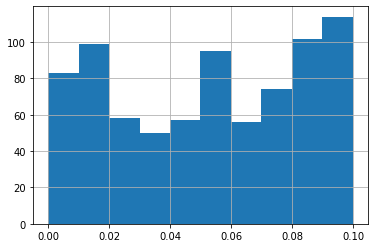

In [ ]:
data["N: q-value"].hist()

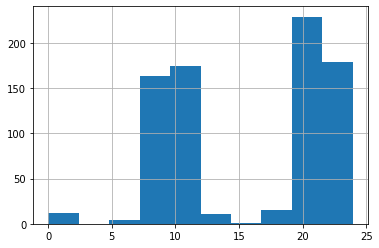

In [ ]:
data["N: Phase"].hist()

In [ ]:
data['Name']=data['T: Protein IDs']+data['T: Gene names']+data['T: id'].apply(str)
dataT=data.set_index('Name').T
#dataT=data.transpose(index="T: Protein IDs")
dataT.shape
dataT.tail(10)

Name,A0A1W2PNX9;A0A1W2PNQ3;A0A1W2PRA7;Q5SVJ7;A0A1W2PPY5;A0A1W2PNY8;A0A1W2PNW6;Q12791-5;Q12791-2;A0A1W2PQ61;H0Y382;A0A1W2PSD3;A0A1W2PQK5;A0A1W2PQU4;A0A1W2PRB0;D5MRH1;S4R2X4;H0Y379;A0A1W2PQA0;A0A1W2PQ93;A0A1W2PPZ1;A0A1W2PNY9;A0A1W2PR62;A0A1W2PRN5;A0A0A0MRR0;A0A1W2PPX7;A0A1W2PP06;A0A1W2PRV4;B7ZMF5;A0A1W2PR56;Q5SVJ9;Q5SVK0;A0A1W2PRG5;Q5SVK5;A0A1W2PRJ1;A0A1W2PP26;A0A1W2PNY7;J3KQ16;A0A0A0MRC3;A0A1W2PQ53;A0A1W2PQJ9;A0A1W2PPS2;A0A0A0MSE6;A0A1W2PP94;A0A1W2PS97;A0A1W2PPH9;A0A1W2PRX6;A0A1W2PPQ3;A0A1W2PNH9;Q5SVJ8;Q12791-4;Q12791;Q12791-7;A0A1W2PNG1;A0A1W2PRE5;Q12791-3KCNMA1380,P30566;A0A7P0T9A7;A0A7P0Z472;A0A096LNY6;A0A0A6YY92;A0A1B0GTJ7;A0A1B0GWJ0;A0A096LNY5;A0A7P0T8E4;A0A1B0GTG9;A0A1B0GWF8;A0A096LP92;P30566-2;A0A096LPA2;A0A096LNY4;A0A096LP72;A0A1W2PRX2;B4DEP1ADSL159,Q15555-4;Q15555-5;Q15555-3;Q15555;K7EL66;K7ERD8;Q15555-2;M0QX52MAPRE23434,Q16401;Q16401-2;F2Z3J2PSMD53469,Q59FY4;Q13085-3;Q13085-2;Q13085;Q13085-4ACACA3234,Q9BR76;A0A087WW53;F5H390;F5H0D2;A9Z1Z3-3;A9Z1Z3CORO1B4468,A0A6I8PTT9;Q06210-2;Q06210;A0A6I8PRN4;A0A6I8PRT6GFPT1593,Q00796;A0A6I8PIS1;H0YKB3;Q00796-2;A0A6I8PRA7SORD3099,K7ENN8;B3KP96;H0Y626;O95361-2;O95361TRIM16812,Q96P70IPO94369,I3L0S1;E7EPA1;O60256-4;O60256-3;O60256-2;O60256;C9JDU5;C9JJS3;C9K0K7PRPSAP21140,Q13033-2;Q13033;G3V3G7;G3V340STRN33227,P48507;P48507-2GCLM2735,P07996;P07996-2;A8MZG1THBS12218,P56178;Q07687;G3V471;F8VXJ2;P56179;P56178-2;Q07687-2;P56177;P56179-2;P56179-3DLX5;DLX2;DLX6;DLX12896,Q96HD1;A0A669KBD3;A0A669KB87;A0A669KBB3;Q96HD1-2;F8WBY3;A0A669KAV0CRELD14319,A0A2R8Y653;Q9BZX2UCK2438,NaN,P09651;P09651-2;A0A7I2V3R8;F8W6I7;P09651-3;A0A7I2V3W0;A0A7I2V2L6;A0A7I2YQX9;F8VZ49;Q32P51;F8VTQ5;A0A2R8Y4L2;H0YH80;F8W646;A0A7I2V5U9;A0A7I2YQ85;A0A7I2YQY2;A0A7I2V2R4;A0A7I2V334;A0A7I2V661;A0A7I2V3K5;A0A7I2V453;A0A7I2V360;A0A7I2V2Q7;A0A7I2V2M7;A0A7I2V4F8;A0A7I2V520;A0A7I2V459;A0A7I2V497;A0A7I2V2X1;A0A7I2V2F1;A0A7I2V4P7;A0A7I2V666;A0A7I2V5P1;A0A7I2V4E2;A0A7I2V3U8;A0A7I2V5N7;A0A7I2V4M0;A0A7I2V3C7;A0A7I2YQV3;A0A7I2V5L7;A0A7I2V3W4;A0A7I2V5T1;F8VYN5;A0A7I2V2Z4;A0A7I2V5H0HNRNPA1;HNRNPA1L22256,NaN,A0A087WXD1;Q96T83SLC9A789,P62745RHOB3002,NaN,NaN,NaN,A0A7P0Z497;P23284;A0A7P0TB45;A0A7P0T7U3PPIB724,P17275JUNB2380,NaN,NaN,Q17RY0-2;B7ZLQ8;Q17RY0;E5RJM0;Q17RY0-3;A0A590UJI5;E5RFP2;H0YBG1;A0A5K1VW93;A0A5K1VW71;A0A5K1VW79;A0A5K1VW61;A0A590UJN2;H0Y9D9;Q7Z5Q1-8;Q7Z5Q1;Q7Z5Q1-3;Q7Z5Q1-6;Q7Z5Q1-4;Q7Z5Q1-5;Q7Z5Q1-7;Q7Z5Q1-9CPEB4880,P20962;F5GXR3PTMS2438,P05121;P05121-2SERPINE12175,Q8IWB1;X6RK76;REV__I3NI21;REV__I3L288;REV__Q96B96;REV__I3NI23;REV__Q96B96-2ITPRIP3901,Q9ULX9-2;Q9ULX9;B0QY71;B0QY70MAFF5124,NaN,NaN,NaN,Q9NPQ8-4;Q9NPQ8;Q9NPQ8-3;Q9NPQ8-2;E9PSI0;H0YE35;E9PI04;H0YEN0;E9PLE5;H0YC88;B7WPL0;Q9NVN3-4;Q9NVN3-3;Q9NVN3;Q9NVN3-1RIC8A4800,P13726-2;P13726F32321,Q07820;A0A087WT64;Q07820-2;A0A7I2V2W2MCL13168,...,P40227;P40227-2;J3KRI6CCT6A2660,Q9UI12-2;Q9UI12;G3V126;E5RK31;E5RJG1;E5RG49ATP6V1H5056,P27658COL8A12514,Q16678;A0A087WUQ7;A0A087WW26CYP1B13483,Q96A65;Q96A65-2EXOC44231,P49721;A0A087WVV1PSMB22762,A0A3B3IRP6;A0A0J9YVP0;O95714;H3BUQ1HERC2315,Q8NBM4-4;Q8NBM4-3;Q8NBM4-2;Q8NBM4;X6R5E5UBAC24011,Q709C8-3;Q709C8;Q709C8-4;Q709C8-2;A0A3B3IU50;A0A3B3IT88VPS13C3773,E9PS17;Q96KG9-3;Q96KG9-2;Q96KG9;E9PPN3;E9PK59;Q96KG9-4;Q96KG9-5;Q96KG9-6;H0YDH0;A0A0A0MQX4SCYL11263,Q9C037-2;Q9C037;Q9C037-3;H7C0Q6TRIM44617,A1X283SH3PXD2B730,O43854-2;O43854EDIL31871,D6RGI3;D6RER5;Q9NVA2;Q9NVA2-2;D6RDU5;H0Y961;H0Y9G8;D6RDP1;D6R9Y6;B1AMS2;Q14141-2;Q14141-4;Q14141SEPT111097,Q9UQ53-2;Q9UQ53;Q9UQ53-3;H0YB89;H0YC13;H0YB84;H0YC56;E5RFL0MGAT4B5154,Q6P1A2;F5H0M4;Q6P1A2-2;F5H680;F5H7K7;B7Z3N5;F5GYT3LPCAT33699,Q15036;Q15036-2;F8WAZ0SNX173392,Q5VWV2;Q8TEW0-3;Q8TEW0-6;Q8TEW0-11;Q8TEW0-2;Q8TEW0;F5GZI3;Q5VWU8;Q8TEW0-9;Q8TEW0-10;Q8TEW0-8;Q8TEW0-5;Q8TEW0-7;Q8TEW0-4PARD33639,Q9NYL2-2ZAK4934,Q9BYC9;I3L2X1;Q9BYC9-2MRPL204588,P51687SUOX2816,Q99829;F2Z2V0;B0QZ18;A6PVH9;E7ENH5;Q5JX56;Q5JX58;Q5JX59;Q5JX60;Q5JX44;Q5JX55;Q5JX45;Q5JX52;Q5JX61;Q5JX54;H0Y524;E7EV27;Q5JX57;Q5JX53CPNE11269,E9PGC0;P20936-2;P20936-4;P20936RASA11199,Q8IXI1;H3BST5;I3L2C6;Q8IXI1-2;H3BUX4;H3BU27;H3BMP9;H3BVI5RHOT23915,E9PNM1;P

In [ ]:
label = pd.read_table('/content/drive/MyDrive/shared/txtNoNQd/labelSwap.txt')
label=label.set_index('Name')
label.head(2)
#label.shape

,IDH1,Group,Time (hours post treatment withdrawal),Replicate,GroupTime,group,group_Replicate,GroupTime_Replicate
Name,,,,,,,,
1_Slot2-1_1_366,100630,WT,ctrl,1,WTctrl,WTctrl,WTctrl_1,WTctrl_1
10_Slot2-10_1_375,126570,WT,4h,1,WT4h,WT4h,WT4h_1,WT4h_1


In [ ]:
#dataM=dataT.merge(label,left_on='T: Protein IDs', right_on='Name',how='outer', indicator=True)
#dataM=dataT.merge(dataT,left_on='T: Protein IDs', right_on='T: Protein IDs',how='outer', indicator=True)
dataM=label.merge(dataT,left_index=True, right_index=True)#left_on='Name', right_on='Name',how='inner', indicator=True)
dataM.shape

(21, 796)

In [ ]:
dataM['Time']=dataM['Time (hours post treatment withdrawal)'].replace('ctrl','-1')
dataM['Time']=dataM['Time'].replace('h','', regex=True)
dataM['Time']=dataM['Time'].astype(int)+1
dataM['Hour']= pd.to_datetime(dataM['Time'])
dataM['Hour']

1_Slot2-1_1_366     1970-01-01 00:00:00.000000000
10_Slot2-10_1_375   1970-01-01 00:00:00.000000005
11_Slot2-11_1_376   1970-01-01 00:00:00.000000005
12_Slot2-12_1_377   1970-01-01 00:00:00.000000005
13_Slot2-13_1_378   1970-01-01 00:00:00.000000009
14_Slot2-14_1_379   1970-01-01 00:00:00.000000009
16_Slot2-16_1_381   1970-01-01 00:00:00.000000013
17_Slot2-17_1_382   1970-01-01 00:00:00.000000013
18_Slot2-18_1_383   1970-01-01 00:00:00.000000013
19_Slot2-19_1_384   1970-01-01 00:00:00.000000025
2_Slot2-2_1_367     1970-01-01 00:00:00.000000000
20_Slot2-20_1_385   1970-01-01 00:00:00.000000025
21_Slot2-21_1_386   1970-01-01 00:00:00.000000025
3_Slot2-3_1_368     1970-01-01 00:00:00.000000000
36_Slot2-36_1_401   1970-01-01 00:00:00.000000009
4_Slot2-4_1_369     1970-01-01 00:00:00.000000001
5_Slot2-5_1_370     1970-01-01 00:00:00.000000001
6_Slot2-6_1_371     1970-01-01 00:00:00.000000001
7_Slot2-7_1_372     1970-01-01 00:00:00.000000003
8_Slot2-8_1_373     1970-01-01 00:00:00.000000003


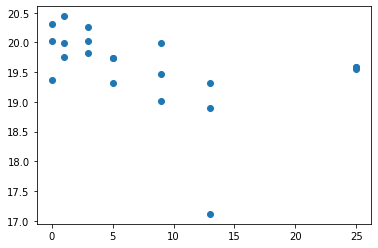

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dataM['Time'],dataM['Q9Y5S2;H0YLY0CDC42BPB5268'],'o')

In [ ]:
#https://github.com/rebecca-vickery/machine-learning-tutorials/tree/master/machine-learning-general
!pip install pycaret

     |████████████████████████████████| 288 kB 4.2 MB/s 
     |████████████████████████████████| 15.5 MB 2.0 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 6.8 MB 33.8 MB/s 
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 113 kB 40.0 MB/s 
     |████████████████████████████████| 1.7 MB 24.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 25.7 MB/s 
     |████████████████████████████████| 2.0 MB 33.1 MB/s 
     |████████████████████████████████| 1.3 MB 17.6 MB/s 
     |████████████████████████████████| 167 kB 15.8 MB/s 
     |████████████████████████████████| 3.1 MB 35.8 MB/s 
     |████████████████████████████████| 62 kB 727 kB/s 
     |████████████████████████████████| 303 kB 35.9 MB/s 
     |████████████████████

In [ ]:
from pycaret.classification import * 
models()

NameError: ignored

In [ ]:
from fastai.tabular.all import *
import pandas as pd
from pycaret.datasets import get_data

data = get_data('wine') 
data.to_csv('wine.csv')

In [ ]:
dls = TabularDataLoaders.from_df(data, y_names="type",
    cat_names = ['quality'],
    cont_names = ['fixed acidity', 'volatile acidity',
                 'citric acid', 'residual sugar',
                 'chlorides', 'free sulfur dioxide',
                 'total sulfur dioxide', 'density',
                 'pH', 'sulphates', 'alcohol'],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(1)

In [ ]:
learn.show_results()
row, clas, probs = learn.predict(data.iloc[5])


In [ ]:
df[['duration', 'target']].groupby('target').boxplot()  


In [ ]:
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport
from sklearn.datasets import fetch_openml
import dabl
from sklearn.datasets import fetch_openml
X,y = fetch_openml("wine", version=1, as_frame=True, return_X_y=True)
data = pd.concat([X,y], axis=1)

data.head()

In [ ]:
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()


In [ ]:
Dora/dabl?
data_clean = dabl.clean(data)
data_clean
dabl.plot(data, 'class')
from Dora import Dora
dora = Dora(output = 'class', data = data)
dora.impute_missing_values()
dora.scale_input_values()
# Save a specific version of the data
dora.snapshot('cleaned_data')
# Track changes to the data
dora.logs

In [ ]:
from prettypandas import PrettyPandas
data['class'] = data['class'].astype('float64')
df_grp = data.groupby('class').mean()
PrettyPandas(df_grp).average().as_unit(precision=2)

In [ ]:
#https://otexts.com/fpp2/arima-r.html
Plot the data and identify any unusual observations.
If necessary, transform the data (using a Box-Cox transformation) to stabilise the variance.
If the data are non-stationary, take first differences of the data until the data are stationary.
Examine the ACF/PACF: Is an ARIMA( 
p
,
d
,
0
 ) or ARIMA( 
0
,
d
,
q
 ) model appropriate?
Try your chosen model(s), and use the AICc to search for a better model.
Check the residuals from your chosen model by plotting the ACF of the residuals, and doing a portmanteau test of the residuals. If they do not look like white noise, try a modified model.
Once the residuals look like white noise, calculate forecasts.
elecequip %>% stl(s.window='periodic') %>% seasadj() -> eeadj
autoplot(eeadj)
eeadj %>% diff() %>% ggtsdisplay(main="")
(fit <- Arima(eeadj, order=c(3,1,1)))
checkresiduals(fit)
autoplot(forecast(fit))

In [ ]:
#https://machinelearningmastery.com/time-series-data-stationary-python/
from statsmodels.tsa.stattools import adfuller
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
import numpy as np
df = 

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
validation = df[~msk]
print(train.shape)
print(validation.shape)
import numpy as np
from import numpy as np
from pycaret.datasets import get_data

df = get_data('employee')

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
validation = df[~msk]
print(train.shape)
print(validation.shape).datasets import get_data

df = get_data('employee')

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
validation = df[~msk]
print(train.shape)
print(validation.shape)

In [ ]:
from pycaret.classification import *

exp_emp0 = setup(data = train, target = 'left', session_id=123)

In [ ]:

lr = create_model('lr')

In [ ]:
compare_model = compare_models()

In [ ]:
rf = create_model('rf')


In [ ]:
tuned_rf = tune_model(rf, optimize='MCC')

In [ ]:
plot_model(tuned_rf, plot='feature')


In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')


In [ ]:
model = load_model('rf_v0.1', 
                   platform = 'aws', 
                   authentication = { 'bucket'  : 'pycaret-models' }, 
                   verbose=True)
validation_data = validation.drop('left', axis=1)
predictions = predict_model(model, data = validation_data)

In [ ]:

import mlflow 
mlflow.set_tracking_uri('/Users/myuser/mlflow')

exp_emp0 = setup(data = train, 
                 target = 'left', 
                 session_id=123, 
                 log_experiment = True, 
                 experiment_name = 'exp_emp0')

In [ ]:
Towards Data Science
Sign in

Get started
Follow
605K Followers
·
Editors' Picks
Features
Deep Dives
Grow
Contribute
About


This is your last free member-only story this month. Sign up for Medium and get an extra one

HANDS-ON TUTORIALS
A Beginner’s Guide to End to End Machine Learning
Learn to train, tune, deploy and monitor models
Rebecca Vickery
Rebecca Vickery

Nov 30·8 min read







Photo by Modestas Urbonas on Unsplash
Supervised machine learning is a technique that maps a series of inputs (X) to some known outputs (y) without being explicitly programmed. Training a machine learning model refers to the process where a machine learns a mapping between X and y. Once trained the model can be used to make predictions on new inputs where the output is unknown.
The training of a machine learning model is only one element of the end to end machine learning lifecycle. For a model to be truly useful this mapping needs to be stored and deployed for use. This is often referred to as putting the model into production. Additionally once a model is in production, the predictions and overall performance of the model need to be monitored to ensure that the quality of the predictions does not degrade over time.
To introduce the basic concepts in the end to end machine learning workflow I am going to use the python library, Pycaret. Pycaret is a low code machine learning library that seeks to simplify and speed up the overall machine learning workflow by providing a high-level programming interface and seeking to automate some of the repetitive tasks in machine learning.
The library is developing quickly and has more recently added functionality to encompass the entire end to end machine learning workflow. From model development to deployment and monitoring. In the following article, I will be using this package to give a simple introduction to the end to end machine learning lifecycle.
The data
In this tutorial, I am going to use one of Pycaret’s built-in datasets known as “employee”. This consists of a set of features about employees at an unspecified company and a target variable that denotes if that employee has left the company. This is a classic classification task in machine learning where the goal is to train a model that can predict if an employee is likely to leave.
The data can easily be imported through the Pycaret API. In the below code we read in the data and reserve a validation sample for later use in the workflow.

The first few lines of the data look as follows:

First few rows of the “employee” dataset. Image by Author.
Preprocessing
Pycaret has a set of modules that contain a suite of functions for a specific machine learning task. The dataset we are using contains a classification problem so we will be primarily using the classification module.
The first step is to import the setup function. This function is run prior to performing any other steps. It initialises the Pycaret environment and creates a transformation pipeline for preprocessing the data ready for modelling. When run Pycaret will infer the data types for all feature and target columns.


Pycaret has inferred the data types for the features and target variable. Image by Author
If we are happy that these data types are correct and are also happy to rely on Pycaret’s default preprocessing methods then we can simply hit enter and Pycaret will prepare the data for modelling, and print a report describing the steps that have been taken.
Below is just the first 15 lines of this 59 line report. The setup functions has a large number of optional parameters that can be used to create custom preprocessing. For example, the parameter categorical_features can be used to manually specify categorical columns where the data type has not been inferred correctly. A full list of available parameters can be found here.

The first 15 lines of the preprocessing report. Image by Author.
In a real-world machine learning project, it is likely that we would perform more in-depth exploratory analysis and custom preprocessing. However, for the purposes of this tutorial, we will continue with the default preprocessing.
Baseline model
Typically in machine learning workflows, it is sensible to train a simple model first to develop a baseline for performance before moving onto more complex algorithms.
At the time of writing, Pycaret supports 18 different algorithms for classification. The full list can be found here. For the baseline model, we will use logistic regression and we use the function create_model to train. To select the algorithm we pass in the abbreviated string found in the documentation. After training, Pycaret will print a report detailing the performance of our model.


The create_mode report. Image by Author.
Comparing models
By establishing a baseline model we have determined that the preprocessing and setup is sufficient to build a classification model.
The next step is to compare the different classification algorithms to determine which is the best one to use for our dataset and problem. Pycaret has a function called compare_models() which allows us to compare the performance of all available algorithms with one line of code.

This function will try all algorithms and output a list ranked by accuracy. You can change the metric to target using the sort argument.

Comparing models. Image by Author.
We can see from this that Random Forest is overall the best model. We will use this model in the rest of our workflow.
We run create_model() again this time selecting the Random Forest algorithm.

Tuning the model
When we run create_model it automatically uses the default parameters. These are not necessarily the best set of parameters to use so we need to tune the model to find the best selection. Running the tune_model() function tunes the hyperparameters of the model using Random grid search.
By default, the function will use a pre-defined grid of parameters but this can be customised by passing a custom grid into the custom_grid parameter. By default, the function will also optimise the accuracy score but this can also be customised using the optimize parameter.
In the below code we use the default parameter grid to tune the model and optimise for the MCC score.

The function returns a table containing k-fold validated scores, by default the number of folds is 10.

Model tuning. Image by Author.
Interpret the results
Pycaret has a selection of built-in plots to interpret the results of the model which can be accessed using the plot_model() function.
Below we inspect feature importances using this function.


Feature importances. Image by Author.
Let’s also visualise the confusion matrix.


The confusion matrix. Image by Author.
Deploy the model
Pycaret has additional functionality to deploy models to the cloud using AWS.
To deploy the model on AWS you must first create an account on aws.amazon.com. Once created you need to generate an access key so that you can allow the Pycaret function to write to your account. To do this follow the following steps.
Login to your AWS account.
Hover over your username in the top right corner.
Select security credentials from the list that appears.

4. From here expand the Access keys section and click on ‘Create new access key’.

5. At this stage you need to download the credentials file when prompted. You will need the credentials contained file in this later.
6. To allow Pycaret to interact with your AWS account you also need to install and configure the AWS CLI. To do this first run the following.
curl "https://awscli.amazonaws.com/AWSCLIV2.pkg" -o "AWSCLIV2.pkg"
Then run this:
sudo installer -pkg ./AWSCLIV2.pkg -target /
Now type aws --version to confirm everything has been installed correctly. You should see something like this.

Now that this is installed we can configure the AWS CLI with your account details. To do this run the command shown below. It will ask you to input the following pieces of information.
AWS Access Key ID: this can be found in the credentials file we downloaded earlier.
AWS Secret Acess Key: also found in the credentials file.
Default region name: this can be found on the AWS console.
Default output format: this should be left blank.
Next, we create an S3 bucket to store the deployed model. From the AWS console select S3 and then create a bucket with your chosen name.

Now we are ready to use Pycaret to deploy our chosen model.

If the model has deployed you will see the following message.

Generate predictions
To use the model we generate predictions on the validation data we reserved earlier.
The code shown below loads the model from S3 and generates predictions on the validation data with the labels removed.

Let’s view the first 5 predictions by running predictions[:5].

First 5 predictions. Image by Author
Monitoring
An important aspect of the production machine learning workflow is tracking and monitoring the experiments that are performed. Pycaret has integration with MLflow an open-source platform for managing the end to end machine learning lifecycle.
To use MLflow via Pycaret we need to import MLflow (this should already have been installed along with Pycaret) and set the tracking URI. We then add a couple of extra parameters as shown below when calling the setup function.

Now if we copy the tracking URI into a browser you should see the mlflow UI and the experiments it has tracked.

mlflow UI. Image by author
We can click through to view the metrics, artifacts and params for each experiment performed.

Experiment tracking. Image by Author
This is a simple tutorial to learn the basic steps involved in an end to end machine learning project. In the real world most machine learning problems, data and deployment solutions require much more complex treatment. However, for the purposes of this tutorial I have used a simple dataset and python library to get you started with learning about the end to end machine learning lifecycle.
Pycaret is an example of a low-code machine learning library. There are a number of tools being developed that seek to simplify machine learning development in different ways. To learn more about these low effort machine learning libraries see my earlier article.
Low Effort Machine Learning Tools
Low code AI with PyCaret, BigQueryML and fastai
towardsdatascience.com

For more information about machine learning in the real world see the article below.
Machine Learning in Real Life
What it is really like to develop a model for a real-world business case
towardsdatascience.com

Thanks for reading!
Sign up for The Variable
By Towards Data Science
Every Thursday, the Variable delivers the very best of Towards Data Science: from hands-on tutorials and cutting-edge research to original features you don't want to miss. Take a look.


Get this newsletter
Machine Learning
Artificial Intelligence
Data Science
Editors Pick
Hands On Tutorials
204


3






More from Towards Data Science
Follow
Your home for data science. A Medium publication sharing concepts, ideas and codes.

Cheng

·Nov 30

Visualize the Decrease in Arctic Sea Ice Extent Over the Past 40 Years
An animated data story with Flourish

Photo by Eva Blue on Unsplash
Hi!
This article is primarily written to present my Udacity Visualization Nanodegree capstone project. Within this article I would like to show you how to make a dynamic radar plot with Flourish and create the presentation slides with audio & auto-play enabled!
Read more · 5 min read

54



Share your ideas with millions of readers.

Write on Medium
Victor Shepelev

·Nov 30

Wikipedia as the Data Source: Taming the Irregular, Part 1
On the challenges of designing the “query language” for a human-readable encyclopedia.

WikipediaQL in action (screenshot by author)
Some time ago, I posted a write-up on Wikipedia’s abundance of knowledge and approaches to extracting it programmatically. It was designated to be a gentle introduction to my new and still rough project, so here is a long-overdue continuation. Or the first part of it.
To reiterate on the where…
Read more · 6 min read

16



Tian Jie

·Nov 30

2021 Tableau Desktop Specialist Certification Exam Review (New Patterns)
Discuss the latest changes on the exam post-Oct 2021, and how to prepare for it
When you land in this post, it is likely that you are trying to find some reviews or posts on what are the changes in the latest Tableau Desktop Certification exam post-Oct 2021, how is the exam looks like, and how you shall prepare for the exams considering the new…
Read more · 13 min read

526


3


Ori Abramovsky

·Nov 30

Pivoting ML Apps to Success
3 lean validations to make sure you’re on the right path

Photo by Pixabay from Pexels
What makes AI applications special
One of the main differences between AI and general developments is the required evaluation scope. On regular apps by knowing what to do and how, validating the need and keeping it simple, you’re almost safe. But on AI apps you can have the best research, top developers and elite product…
Read more · 6 min read

11



Bassel Karami

·Nov 30

Agent-Based Model Visualization
Modeling the spread of COVID using a spatial model in Python’s Mesa library and visualization modules

Image by author
Introduction
In a previous article, I provide an introductory example (optimizing the number of supermarket counters) of how one can run agent based models using Python’s Mesa library. …
Read more · 3 min read

39



Read more from Towards Data Science
More From Medium
Driving Behavior Analysis — A Driver’s “DNA”
M. Afnan Mansoor

How to Learn Data Science for Free
Rebecca Vickery in Towards Data Science

Completely Free Machine Learning Reading List
Rebecca Vickery in Towards Data Science

Open JSON file in Python Pandas
kedar galande

My First Project!
Siddhi Salvi

Team 24: Predict The Now.
Laasya Eluri

Twitter Analytics — Part II
Daniel Moriarty

Filter out the noise from your data with Kydavra PCAFilter
Vasile Păpăluță in softplus-publication

About

Write

Help

Legal

In [ ]:
#https://medium.com/wegaw/time-series-forecasting-in-python-from-zero-to-neural-networks-in-only-a-month-8e12d6a6e2f4
statsmodels.tsa.api.VAR()
#To make absolutely sure the data was stationary, I ran a unit root test on each dataset. I used the augmented Dickey-Fuller test provided by the statsmodels library (statsmodels.tsa.stattools.adfuller()), although other options are available and equivalent.
statsmodels.tsa.arima.model.ARIMA() class, which takes as parameters a time series and an order in the form of a tuplet (p, d, q).
While this (an ARIMA model) is not the same as an ARMA model, we can set d equal to zero, and keep p and q as the orders of the AR and MA models respectively to create an ARMA model.
https://otexts.com/fpp2/MA.html
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/


In [ ]:
import pandas as pd
data = pd.read_csv(   'https://raw.githubusercontent.com/Garve/datasets/3b6b1e6fadc04e2444905db0a0b2ed222daeaa28/rolling_data.csv',
    index_col='t'
)

In [ ]:
w = 30 # sliding window of length 30
slopes = []
intercepts = []
for i in range(len(data) - w):
    X = data.loc[i:i+w, ['x']]
    y = data.loc[i:i+w, 'y']
    lr = LinearRegression()
    lr.fit(X, y)
    intercepts.append(lr.intercept_)
    slopes.append(lr.coef_[0])

In [ ]:
import pymc3 as pm
with pm.Model() as linear_model:
    slope = pm.Normal('slope', sigma=1) # a
    intercept = pm.Normal('intercept', sigma=1) # b
    noise = pm.Exponential('noise', lam=1)
    y = pm.Normal(
        'y',
        mu=slope*data['x'] + intercept, # the linear model equation
        sigma=noise,
        observed=data['y']
    )
    linear_trace = pm.sample(return_inferencedata=True)

In [ ]:
import pymc3 as pm
with pm.Model() as linear_model_2:
    slopes = pm.Normal('slopes', sigma=1, shape=len(data))
    intercepts = pm.Normal('intercepts', sigma=1, shape=len(data))
    noise = pm.Exponential('noise', lam=1)
    
    y = pm.Normal(
        'y',
        mu=slopes*data['x'] + intercepts,
        sigma=noise,
        observed=data['y']
    )
    
    linear_trace_2 = pm.sample(return_inferencedata=True)

In [ ]:
np.random.seed(0)
steps = 20 # length of the random walk
a = [0] # the initial slope, can be anything
sigma = 1 # the error
for t in range(steps):
    a.append(np.random.normal(a[-1], sigma))

In [ ]:
With it, we can write down the final model in PyMC3 now. The overall shape is quite similar to before. We just have to
introduce two Gaussian random walks, one for the slope and one for the intercept, as well as
two noise parameters for these Gaussian random walks
Here is the model proposal:
with pm.Model() as rolling_linear_model:
    # noise parameters
    sigma_slope = pm.Exponential('sigma_slope', lam=1)
    sigma_intercept = pm.Exponential('sigma_intercept', lam=1)
    sigma = pm.Exponential('sigma', lam=1)
    
    # Gaussian random walks
    slopes = pm.GaussianRandomWalk(
        'slopes',
        sigma=sigma_slope,
        shape=len(data)
    )
    intercepts = pm.GaussianRandomWalk(
        'intercepts',
        sigma=sigma_intercept,
        shape=len(data)
    )
    
    # putting it together
    y = pm.Normal(
        'y',
        slopes*data['x'] + intercepts,
        sigma,
        observed=data['y']
    )
    
    rolling_linear_trace = pm.sample(return_inferencedata=True)
Running this model takes some time compared to the simple linear regressions from before because there are a lot of parameters that are also stochastically dependent on each other. It should still take less than 15 minutes on your machine, though.
We can run a posterior predictive check to see if the model picked up some useful patterns via
import arviz as az
with rolling_linear_model:
    posterior = pm.sample_posterior_predictive(rolling_linear_trace)
    az.plot_ppc(az.from_pymc3(posterior_predictive=posterior))
This outputs

Image by the author.
which means that the model captured the observed data exceptionally well, as the black Observed line is well within the blue Posterior predictive tube. The r² is doing great as well:
az.r2_score(data['y'].values, rolling_posterior['y'])
# Output:
r2        0.981449
r2_std    0.000920
Note, however, that this is the training performance. The model might or might not overfit, but this is nothing that we will discuss here.
All in all, it looks good. It is time to extract what the model has learned about the slope and intercept

In [ ]:
import matplotlib.pyplot as plt
# extract the means and standard deviations of the slopes
posteriors = rolling_linear_trace.posterior.slopes.values
slopes_means = posteriors.reshape(4000, len(data)).mean(0)
slopes_stds = posteriors.reshape(4000, len(data)).std(0)
# plot
plt.figure(figsize=(16, 8))
plt.fill_between(
    range(len(data)),
    slopes_means - 2*slopes_stds,
    slopes_means + 2*slopes_stds,
    alpha=0.33,
    label='$\mu \pm 2\sigma$'
)
plt.plot(slopes_means, linewidth=1, label='$\mu$')
plt.title('Slope over time')
plt.xlabel('Time')
plt.legend()

In [ ]:
#https://towardsdatascience.com/rockin-rolling-regression-in-python-via-pymc3-e4722b6118cd


In [ ]:
df=pd.DataFrame(data)
X = df.iloc[:, :3955]
y = df.iloc[:, 3956]

In [ ]:
#https://automl.github.io/auto-sklearn/master/examples/20_basic/example_multilabel_classification.html#sphx-glr-examples-20-basic-example-multilabel-classification-py
!pip install auto-sklearn

     |████████████████████████████████| 6.3 MB 4.5 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 22.3 MB 40 kB/s 
     |████████████████████████████████| 722 kB 55.9 MB/s 
     |████████████████████████████████| 4.2 MB 34.8 MB/s 
     |████████████████████████████████| 4.0 MB 41.0 MB/s 
     |████████████████████████████████| 208 kB 42.6 MB/s 
     |████████████████████████████████| 973 kB 57.3 MB/s 
     |████████████████████████████████| 125 kB 59.3 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.0-py3-none-any.whl size=6585992 sha256=64d840fe46e205751cd7ccaaf92f9c8f003f8d08bc60800a247cb7a5cb3449ca
  Stored in directory: /root/.cache/pip/wheels/c5/56/cc/e33d4a8cb4ffeb040d59ea08c4715d20806945dc80d3c25384
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=e2adc68bdc77285213494fe63228f45c770ec7e602a1b0d9ec6f2a5684910c9e


In [ ]:
!pip install scipy==1.7.0

     |████████████████████████████████| 28.5 MB 32 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.utils.multiclass import type_of_target
import autosklearn.classification

In [ ]:
#X, y = sklearn.datasets.fetch_openml(data_id=40594, return_X_y=True, as_frame=False)

In [ ]:
#y[y == 'TRUE'] = 1
#y[y == 'FALSE'] = 0
#y = y.astype(np.int)

# Using type of target is a good way to make sure your data
# is properly formatted
print(f"type_of_target={type_of_target(y)}")

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

type_of_target=multiclass


In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60,
    per_run_time_limit=30,
    # Bellow two flags are provided to speed up calculations
    # Not recommended for a real implementation
    initial_configurations_via_metalearning=0,
    smac_scenario_args={'runcount_limit': 1},
)
automl.fit(X_train, y_train, dataset_name='myeloma')

[WARNING] [2021-10-22 08:44:51,272:Client-AutoML(1):myeloma] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.


AutoSklearnClassifier(initial_configurations_via_metalearning=0,
                      per_run_time_limit=30,
                      smac_scenario_args={'runcount_limit': 1},
                      time_left_for_this_task=60)

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight           type  cost  duration
model_id                                                      
2            1              1.0  random_forest  0.25  2.082478


In [ ]:
print(automl.show_models())

[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:

In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: myeloma
  Metric: accuracy
  Best validation score: 0.750000
  Number of target algorithm runs: 1
  Number of successful target algorithm runs: 1
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [ ]:
predictions = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.9166666666666666


In [ ]:
#https://github.com/automl/Auto-PyTorch
from autoPyTorch import AutoNetClassification

# data and metric imports
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1)

# running Auto-PyTorch
autoPyTorch = AutoNetClassification("tiny_cs",  # config preset
                                    log_level='info',
                                    max_runtime=300,
                                    min_budget=30,
                                    max_budget=90)

autoPyTorch.fit(X_train, y_train, validation_split=0.3)
y_pred = autoPyTorch.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_pred))

In [ ]:
# https://autokeras.com/tutorial/customized/ Build the AutoModel
input_node = ak.Input()
output_node = SingleDenseLayerBlock()(input_node)
output_node = ak.RegressionHead()(output_node)
auto_model = ak.AutoModel(input_node, output_node, overwrite=True, max_trials=1)
# Prepare Data
num_instances = 100
x_train = np.random.rand(num_instances, 20).astype(np.float32)
y_train = np.random.rand(num_instances, 1).astype(np.float32)
x_test = np.random.rand(num_instances, 20).astype(np.float32)
y_test = np.random.rand(num_instances, 1).astype(np.float32)
# Train the model
auto_model.fit(x_train, y_train, epochs=1)
print(auto_model.evaluate(x_test, y_test))

In [ ]:
#https://github.com/awslabs/autogluon
!pip install autogluon

     |████████████████████████████████| 352 kB 2.9 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 273 kB 61.4 MB/s 
     |████████████████████████████████| 131 kB 64.5 MB/s 
     |████████████████████████████████| 206 kB 49.1 MB/s 
     |████████████████████████████████| 27.4 MB 95 kB/s 
     |████████████████████████████████| 4.2 MB 10.5 MB/s 
     |████████████████████████████████| 119 kB 52.5 MB/s 
     |████████████████████████████████| 1.3 MB 54.4 MB/s 
     |████████████████████████████████| 3.0 MB 35.2 MB/s 
     |████████████████████████████████| 296 kB 44.8 MB/s 
     |████████████████████████████████| 67.3 MB 7.4 kB/s 
     |████████████████████████████████| 2.0 MB 19.0 MB/s 
     |████████████████████████████████| 166.7 MB 16 kB/s 
     |████████████████████████████████| 186 kB 65.9 MB/s 
     |████████████████████████████████| 157 kB 43.0 MB/s 
     |██████████████

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
predictor = TabularPredictor(label='Group').fit(df, time_limit=120)  # Fit models for 120s
leaderboard = predictor.leaderboard(df)

No path specified. Models will be saved in: "AutogluonModels/ag-20211021_134502/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20211021_134502/"
AutoGluon Version:  0.3.1
Train Data Rows:    46
Train Data Columns: 3956
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	3 unique label values:  ['G', 'L', 'M']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
NumExpr defaulting to 2 threads.
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12628.4 MB
	Train Data (Original)  Memory Usage: 1.46 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manuall

                  model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMLarge    0.978261        0.9        0.032357       0.026543   7.061856                 0.032357                0.026543           7.061856            1       True         12
1               XGBoost    0.978261        0.9        0.070585       0.022309   3.107075                 0.070585                0.022309           3.107075            1       True         11
2        KNeighborsDist    0.978261        0.9        0.108402       0.108595   1.261775                 0.108402                0.108595           1.261775            1       True          2
3      RandomForestEntr    0.978261        0.9        0.116371       0.103962   3.274807                 0.116371                0.103962           3.274807            1       True          7
4        ExtraTreesEntr    0.978261     

In [ ]:
#https://mlbox.readthedocs.io/en/latest/introduction.html
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *
paths = ["<file_1>.csv", "<file_2>.csv", ..., "<file_n>.csv"] #to modify
target_name = "<my_target>" #to modify
data = Reader(sep=",").train_test_split(paths, target_name)  #reading
data = Drift_thresholder().fit_transform(data)  #deleting non-stable variables
Optimiser().evaluate(None, data)
space = {

        'ne__numerical_strategy' : {"space" : [0, 'mean']},

        'ce__strategy' : {"space" : ["label_encoding", "random_projection", "entity_embedding"]},

        'fs__strategy' : {"space" : ["variance", "rf_feature_importance"]},
        'fs__threshold': {"search" : "choice", "space" : [0.1, 0.2, 0.3]},

        'est__strategy' : {"space" : ["LightGBM"]},
        'est__max_depth' : {"search" : "choice", "space" : [5,6]},
        'est__subsample' : {"search" : "uniform", "space" : [0.6,0.9]}

        }

best = opt.optimise(space, data, max_evals = 5)
Predictor().fit_predict(best, data)

In [ ]:
#http://epistasislab.github.io/tpot/examples/
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),
    iris.target.astype(np.float64), train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_iris_pipeline.py')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9826086956521738
exported_pipeline = make_pipeline(
    Normalizer(norm="l2"),
    KNeighborsClassifier(n_neighbors=5, p=2, weights="distance")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [ ]:
#https://github.com/pycaret/pycaret/blob/master/examples/Fetal%20State%20Classification%20Tutorial%20-FSC101.ipynb
from pycaret.classification import *
clf=setup(data=df,target='NSP')
compare_models()

In [ ]:
xgboost_classifier=create_model('xgboost')
print(xgboost_classifier)
tuned_xgboost_classifier=tune_model(xgboost_classifier)
plot_model(tuned_xgboost_classifier,plot='class_report')
plot_model(tuned_xgboost_classifier,plot='confusion_matrix')
save_model(tuned_xgboost_classifier,"XGBOOST CLASSIFIER")
saved_model=load_model('XGBOOST CLASSIFIER')

In [ ]:
# mljar-supervised package
from supervised.automl import AutoML

# load the data
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame(digits.data), digits.target, stratify=digits.target, test_size=0.25,
    random_state=123
)

# train models with AutoML
automl = AutoML(mode="Perform")
automl.fit(X_train, y_train)

# compute the accuracy on test data
predictions = automl.predict_all(X_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions["label"].astype(int)))

In [ ]:
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#code-examples
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
aml.leader

In [ ]:
#https://github.com/ludwig-ai/ludwig
from ludwig.api import LudwigModel

# train a model
config = {...}
model = LudwigModel(config)
train_stats = model.train(training_data)

# or load a model
model = LudwigModel.load(model_path)

# obtain predictions
predictions = model.predict(test_data)


In [ ]:
!python -c "import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([69, 69])))"

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
pip install jupyter_http_over_ws
jupyter serverextension enable --py jupyter_http_over_ws
jupyter notebook   --NotebookApp.allow_origin='https://colab.research.google.com'  --port=8888   --NotebookApp.port_retries=0

In [ ]:
tf.test.is_gpu_available()

In [ ]:
if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
with tf.device('/device:CPU:0'):
  a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
  c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
#print(sess.run(c))

In [ ]:
tf.debugging.experimental.enable_dump_debug_info("logs", tensor_debug_mode="FULL_HEALTH", circular_buffer_size=-1)

In [ ]:
!pwd

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
list(le.classes_)
values=le.transform(y)
print(values)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(le.transform(y).reshape(-1,1))
enc.categories_
#print(enc.transform(le.transform(y).reshape(-1,1)))

In [ ]:
#print(np.array(tf.one_hot(le.transform(y), depth=3)))
#vocabulary_feature_column =  tf.feature_column.categorical_column_with_vocabulary_list(key=["P", "V", "K"],vocabulary_list=["P", "V", "K"])
import numpy as np
n_values = np.max(values) + 1
Y=np.eye(n_values)[values]

In [ ]:
#Y=pd.DataFrame(np.array(tf.one_hot(le.transform(y), depth=3)))
Y=pd.DataFrame(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
X_train.to_csv("X_train.csv", index = False, header = None)
X_test.to_csv("X_test.csv", index = False, header = None)
Y_train.to_csv("Y_train.csv", index = False, header = None)
Y_test.to_csv("Y_test.csv", index = False, header = None)
Y_test.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape[1],Y_train.shape[1] 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 9, activation = 'relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = Y_train.shape[1] , activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
classifier.fit(X_train, Y_train, batch_size = X_train.shape[1],epochs = 100)

In [ ]:
Y_pred = classifier.predict(X_test)
#Y_pred
y_pred=(Y_pred.argmax(1)[:,None] == np.arange(Y_pred.shape[1])).astype(int)
y_pred

In [ ]:
y_test=Y_test.values
y_test=(y_test.argmax(1)[:,None] == np.arange(y_test.shape[1])).astype(int)
y_test

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

In [ ]:
# Install TensorFlow Dececision Forests.
!pip install tensorflow_decision_forests
# Use wurlitzer to capture training logs.
!pip install wurlitzer

In [ ]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import collections
try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes
from IPython.core.magic import register_line_magic
from IPython.display import Javascript
@register_line_magic
def set_cell_height(size):
  display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [ ]:
!ls /content/drive/My*Drive/notebooks/*.csv

In [ ]:
#from file icon, right click => https://www.roelpeters.be/running-an-r-kernel-in-google-colab/ 
#dataset_df = data
dataset_df = pd.read_csv("/content/drive/MyDrive/Supplementary Table 2 for working purpose.xlsxgene.NARM3CON.csv")
#dataset_df = dataset_df.drop('Unnamed: 0', 1)
print(dataset_df.head(3))

In [ ]:
#dataset_df = pd.read_csv("/content/drive/My Drive/Table.csv")
dataset_df = pd.read_csv('/content/drive/MyDrive/notebooks/Supplementary Table 2 for working purpose.xlsxid.csv')
print(dataset_df.head(3))

In [ ]:
classes = dataset_df["Group"].unique().tolist()
#classes = dataset_df["T: Class"].unique().tolist()
print(f"Label classes: {classes}")

In [ ]:
#dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Mayo Score")
dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Group")
#dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="T: Class")
model = tfdf.keras.RandomForestModel(compute_oob_variable_importances=True,# growing_strategy="BEST_FIRST_GLOBAL",
      num_trees=500,
#    max_depth=8,
#    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
#hyperparameter_template="benchmark_rank1",
)
model.compile(metrics=["accuracy"])
with sys_pipes():
  model.fit(x=dataset_tf)

In [ ]:
%set_cell_height 300
model.summary()

In [ ]:
evaluation = model.evaluate(dataset_tf, return_dict=True)
print()
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=1, max_depth=100)

In [ ]:
inspector = model.make_inspector()
#?inspector.model_type

In [ ]:
[field for field in dir(inspector) if not field.startswith("_")]

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
def select_subject(subID):
    df_filtered= dataset_df[subID]
    ax = df_filtered.apply(np.sum).hist(color="orange")
subject = dataset_df.columns
interact(select_subject, subID=subject)

In [ ]:
print("Model type:", inspector.model_type())
print("Number of trees:", inspector.num_trees())
print("Objective:", inspector.objective())
print("Input features:", inspector.features())

In [ ]:
inspector.evaluation()

In [ ]:
for importance in inspector.variable_importances().keys():
  print("\t", importance)

In [ ]:
inspector.variable_importances()["NUM_NODES"]

In [ ]:
inspector.variable_importances()["SUM_SCORE"]

In [ ]:
inspector.variable_importances()["MEAN_DECREASE_IN_ACCURACY"]

In [ ]:
inspector.extract_tree(tree_idx=0)

In [ ]:
# number_of_use[F] will be the number of node using feature F in its condition.
number_of_use = collections.defaultdict(lambda: 0)

# Iterate over all the nodes in a Depth First Pre-order traversals.
for node_iter in inspector.iterate_on_nodes():

  if not isinstance(node_iter.node, tfdf.py_tree.node.NonLeafNode):
    # Skip the leaf nodes
    continue

  # Iterate over all the features used in the condition.
  # By default, models are "oblique" i.e. each node tests a single feature.
  for feature in node_iter.node.condition.features():
    number_of_use[feature] += 1

print("Number of condition nodes per features:")
for feature, count in number_of_use.items():
  print("\t", feature.name, ":", count,"\n")

In [ ]:
%set_cell_height 150
model.make_inspector().training_logs()

In [ ]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
print(evaluation)

#print(f"MSE: {evaluation['mse']}")
#print(f"RMSE: {math.sqrt(evaluation['mse'])}")

https://towardsdatascience.com/seeing-numbers-bayesian-optimisation-of-a-lightgbm-model-3642228127b3

In [ ]:
nfold      = 5
df=dataset_df
df['fold'] = pd.util.hash_pandas_object(df) % nfold
print(df['fold'].sum())

In [ ]:

def cross_val(eta=0.1,num_leaves=8,bag_frac=0.8,bag_freq=5,feat_frac=0.8):
    
    '''
    A function to return cross-validated LightGBM model accuracy
    
    Inputs
      eta: float, learning rate for model
      num_leaves: int, maximum number of leaves in tree
      bag_frac: float, random bagging fraction
      bag_freq: int, frequency of bagging
      feat_frac: float, feature fraction
    
    Outputs
      float, model accuracy from best iteration of cross-validated model
    '''
    
    # set the model parameters
    parameters = {
        'objective': 'multiclass',
        'metric': 'multi_error',
        'num_class':10,
        'learning_rate': eta,
        'num_leaves': int(num_leaves), # need to set this as int since optimisation feeds in float
        'bagging_fraction': bag_frac,
        'bagging_freq': int(bag_freq), # need to set this as int since optimisation feeds in float
        'feature_fraction': feat_frac,
        'force_col_wise':True, # suppress the warning
        'verbosity':-1
        }
    
       
    model = lgb.cv(
        params = parameters,
        train_set = dtrain,
        num_boost_round = 500,
        early_stopping_rounds = 10,
        folds = (([idx for idx in folds.index if folds[idx] != j],
                  [idx for idx in folds.index if folds[idx] == j]) for j in range(int(folds.max()))), # custom generator
        shuffle = False, # false as we're using our own folds
        verbose_eval = -1
        )
        
    
    # return accuracy rather than error
    # as the optimiser seeks to maximise rather than minimise
    return 1. - model['multi_error-mean'][-1]

In [ ]:
space = {
    'eta':(0.025,0.15),
    'num_leaves':(2,16),
    'bag_frac':(0.5,0.8),
    'bag_freq':(1,5),
    'feat_frac':(0.5,0.8)
    }


# set up the optimiser
optimiser = BayesianOptimization(
    f = cross_val,
    pbounds = space,
    verbose = 2,
    random_state = 0)

In [ ]:
cluster = KMeans(n_clusters=10,random_state=0)

# empty dict to hold results
d = {}

# loop through folds
for fold in folds.unique():
    
    # fit cluster on in-fold data
    cluster.fit(df_pca[folds!=fold])
    
    # get out-of-fold predictions
    d[fold] = cluster.predict(df_pca)*(1*(folds==fold))

# crunch to single column, ready for joining
clusters = pd.DataFrame(d).sum(axis=1).to_frame(name='cluster')